## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
train = pd.read_csv("dataset/train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA

### Handling missing data

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

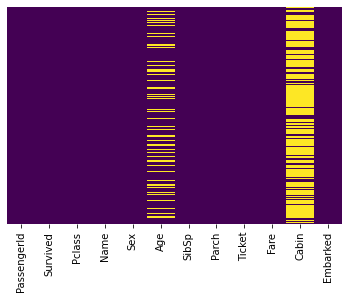

In [6]:
# not feasible due to large number of entries
# so visualization concept k/a heatmap is used

sns.heatmap(train.isnull(), yticklabels=False, cmap="viridis", cbar=False)


### Continuing EDA of other categories

<AxesSubplot:xlabel='Survived', ylabel='count'>

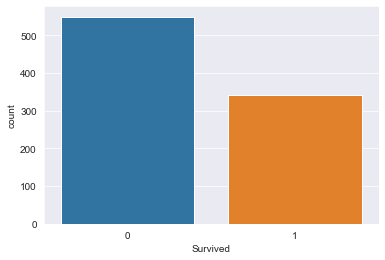

In [7]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

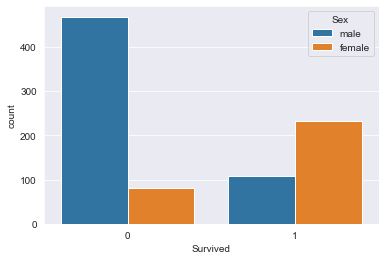

In [8]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

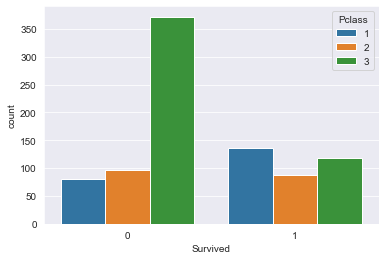

In [9]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

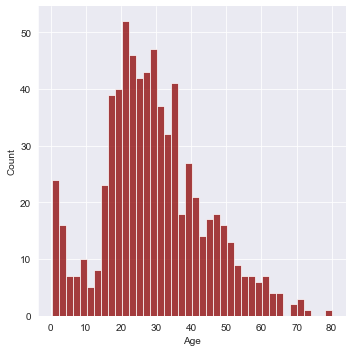

In [10]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

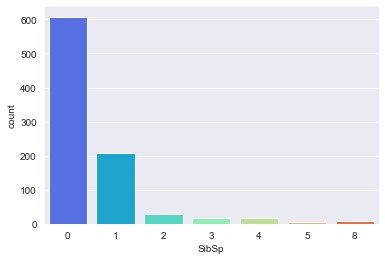

In [11]:
sns.countplot(x='SibSp',data=train,palette='rainbow')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

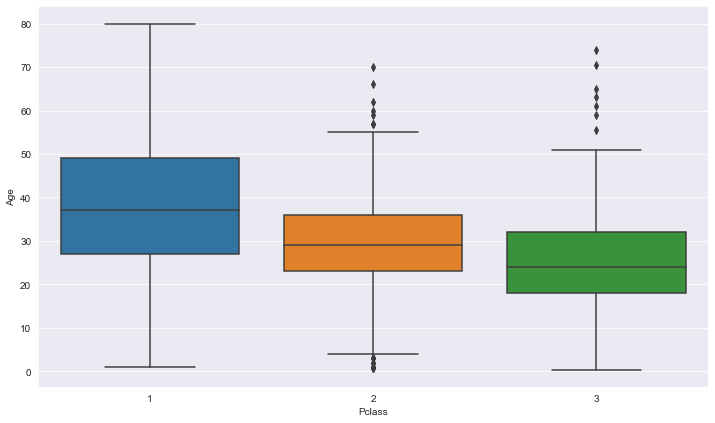

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [13]:
def compute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
# applying above function

train['Age']=train[['Age','Pclass']].apply(compute_age,axis=1)

<AxesSubplot:>

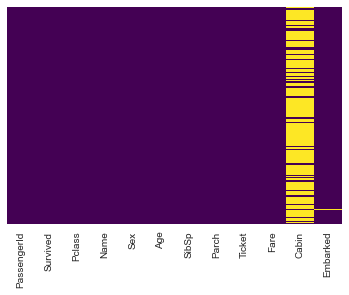

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cmap="viridis",cbar=False)

In [16]:
# now drop Cabin category for now as it has too many Nan values

train.drop('Cabin',axis=1,inplace =True)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Encoding (Converting Categorical Variables to Numerical Ones)

In [19]:
# in this case sex & embarked

pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [21]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [23]:
train = pd.concat([train,sex,embark],axis=1)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Analyzing Family (parents + siblings)

In [25]:
Sibsp =train['SibSp'].values 
Parch = train['Parch'].values
family = np.add(Sibsp ,Parch)


In [26]:
train['Family_size'] = family

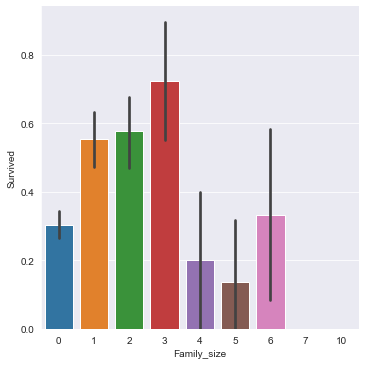

In [27]:
sns.catplot(x='Family_size' ,y='Survived' ,kind='bar' ,data=train)

In [28]:
# Splitting family into 3 categories 

train['Family_remark'] = 0

train.loc[train['Family_size'] == 0 ,'Family_remark'] = 'No Family'
train.loc[train['Family_size'].between(1,3) ,'Family_remark'] = 'Small Family'
train.loc[train['Family_size'].between(4, 10), 'Family_remark'] = 'Large Family'


In [29]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S', 'Family_size', 'Family_remark'],
      dtype='object')

In [30]:
train.loc[train['Family_size'] > 6]


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Family_size,Family_remark
59,60,0,3,11.0,5,2,46.90,1,0,1,7,Large Family
71,72,0,3,16.0,5,2,46.90,0,0,1,7,Large Family
159,160,0,3,24.0,8,2,69.55,1,0,1,10,Large Family
180,181,0,3,24.0,8,2,69.55,0,0,1,10,Large Family
201,202,0,3,24.0,8,2,69.55,1,0,1,10,Large Family
324,325,0,3,24.0,8,2,69.55,1,0,1,10,Large Family
386,387,0,3,1.0,5,2,46.90,1,0,1,7,Large Family
480,481,0,3,9.0,5,2,46.90,1,0,1,7,Large Family
678,679,0,3,43.0,1,6,46.90,0,0,1,7,Large Family
683,684,0,3,14.0,5,2,46.90,1,0,1,7,Large Family


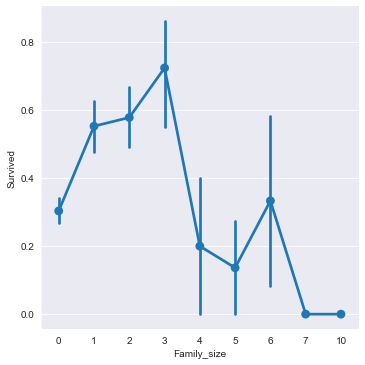

In [31]:
sns.catplot(x='Family_size', y='Survived', data=train, kind='point')


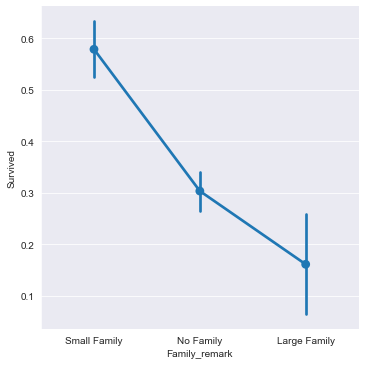

In [32]:
sns.catplot(x='Family_remark', y='Survived', data=train ,kind='point')

## Analysing Fare

<AxesSubplot:>

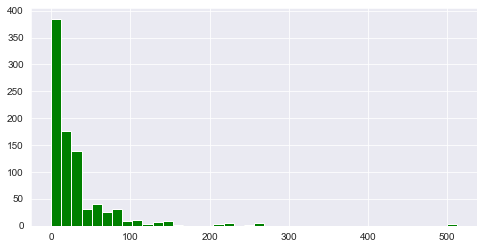

In [33]:
train['Fare'].hist(color='green', bins=40, figsize=(8, 4))


In [34]:
# Splitting fare into 2 categories

train['Fare Range'] = 0

train.loc[train['Fare'].between(0,75) ,'Fare Range'] = 'Low Fare'
train.loc[train['Fare'].between(75, 300), 'Fare Range'] = 'High Fare'


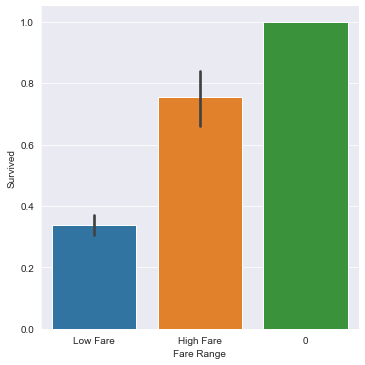

In [35]:
sns.catplot(x='Fare Range', y='Survived' ,kind='bar' ,data=train)


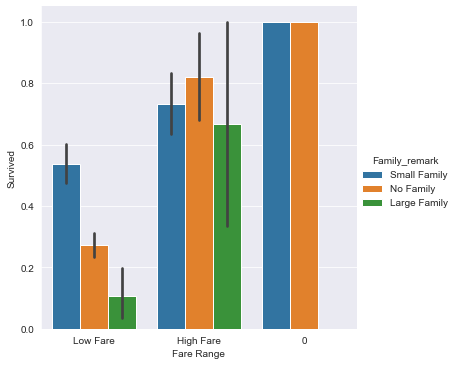

In [36]:
sns.catplot(x='Fare Range', y='Survived',hue='Family_remark', kind='bar', data=train)


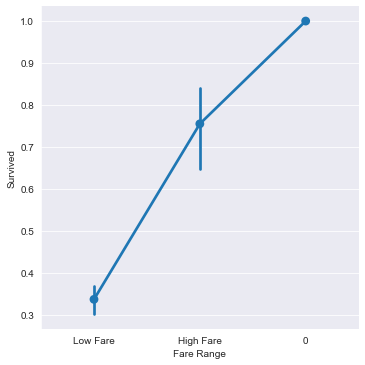

In [37]:
sns.catplot(x='Fare Range', y='Survived', data=train, kind='point')

## Analyzing Age

In [38]:
train['Age_category'] = 0
train.loc[train['Age'] < 16, 'Age_category'] = 'Child'
train.loc[train['Age'].between(16, 60), 'Age_category'] = 'Adult'
train.loc[train['Age'] > 60, 'Age_category'] = 'Old'

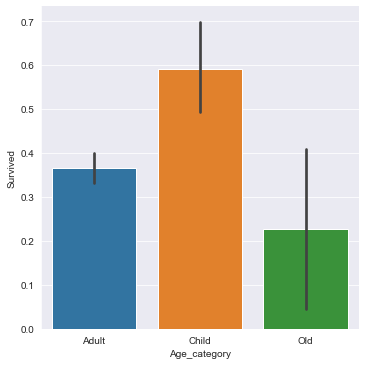

In [39]:
sns.catplot(x='Age_category' ,y='Survived' ,kind='bar' ,data=train)

In [40]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S', 'Family_size', 'Family_remark', 'Fare Range',
       'Age_category'],
      dtype='object')

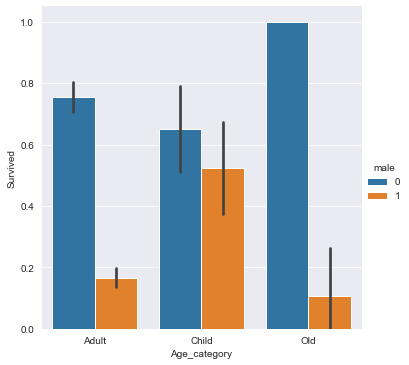

In [41]:
sns.catplot(x='Age_category', y='Survived',hue='male', kind='bar', data=train)


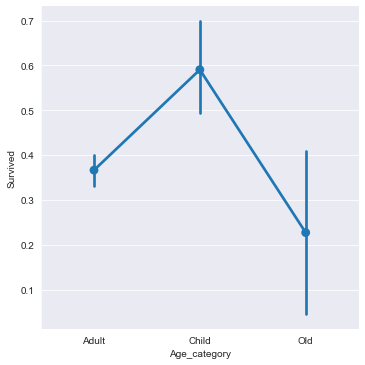

In [42]:
sns.catplot(x='Age_category', y='Survived', kind='point', data=train)
